# S04 T02: Visualització gràfica de Múltiples variables

**Descripció**:

Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables.

In [1]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import rcParams
import seaborn as sns
from wordcloud import WordCloud
# Imports required for Plotly
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) #This is important 
import plotly_express as px
# Plotly Imports Ends
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("./input"))

%matplotlib inline

['movies.dat', 'tips.csv']


**Nivell 1**

- Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [2]:
# load the dataset
pd.options.display.max_columns = None
file = "tips.csv"
input_path = r"./input/"
#print(input_path)

# Restaurant dataset on weekly tickets
rest_df = pd.read_csv(input_path + file, sep=',', encoding='utf8')
#df.sample(7)
rest_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
rest_df.shape

(244, 7)

In [4]:
rest_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


- Performing data cleansing activities

  - Renaming some columns for better interpretability

In [6]:
rest_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
rest_df.rename(columns={'size': 'pax'}, inplace=True)

In [8]:
# figure size in inches
sns.set(rc={'figure.figsize':(11.7,8.27)}) # import seaborn as sns
# Another alternative
#rcParams['figure.figsize'] = 11.7,8.27 # from matplotlib import rcParams

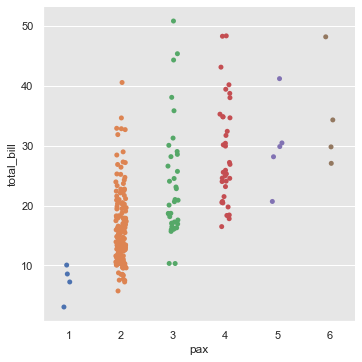

In [9]:
sns.set_context("notebook") # paper, notebook, talk, and poster
#sns.set_theme()
#sns.set_style("white") # Removing axes spines
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("ticks") # Removing axes spines
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.axes_style()
sns.catplot(x="pax", y="total_bill", data=rest_df)
#sns.despine() # Removing axes spines
#sns.despine(offset=10, trim=True)
#sns.despine(bottom=True, left=True)


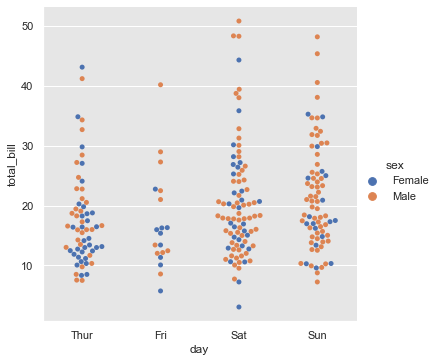

In [10]:
sns.catplot(x="day", y="total_bill", hue="sex", order=["Thur","Fri","Sat","Sun"], kind="swarm", data=rest_df)

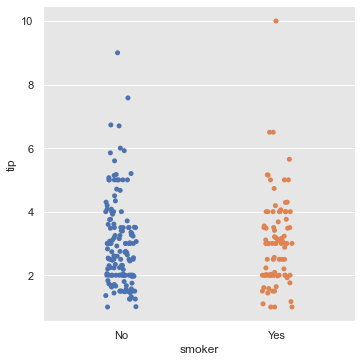

In [11]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=rest_df)

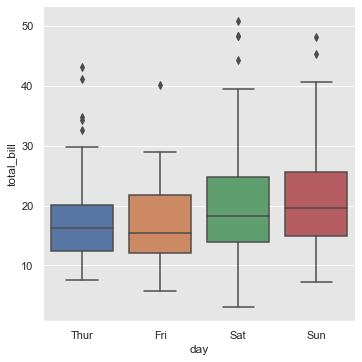

In [12]:
sns.catplot(x="day", y="total_bill", order=["Thur","Fri","Sat","Sun"], kind="box", data=rest_df)

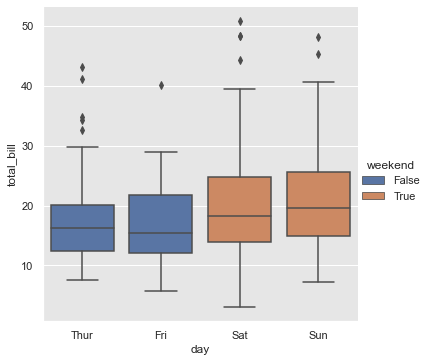

In [13]:
rest_df["weekend"] = rest_df["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend", order=["Thur","Fri","Sat","Sun"], kind="box", dodge=False, data=rest_df)

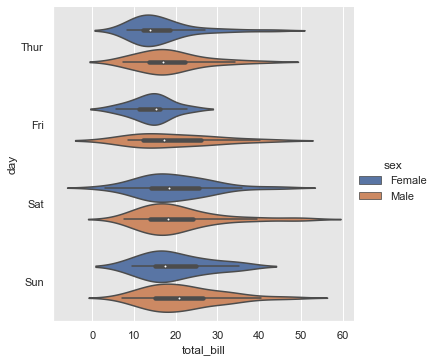

In [14]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", order=["Thur","Fri","Sat","Sun"], data=rest_df)

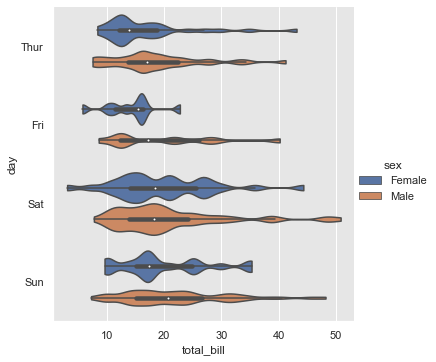

In [15]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", order=["Thur","Fri","Sat","Sun"], bw=.15, cut=0, data=rest_df)

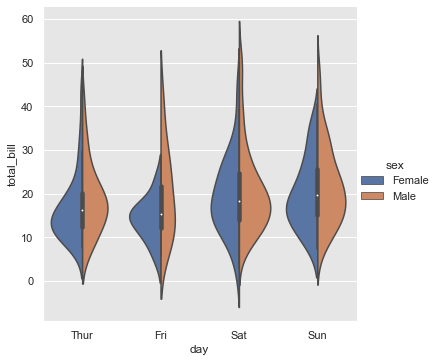

In [16]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, order=["Thur","Fri","Sat","Sun"], data=rest_df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

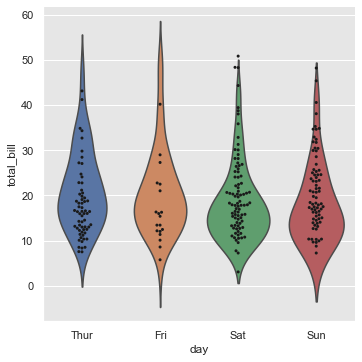

In [17]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=rest_df)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, order=["Thur","Fri","Sat","Sun"], data=rest_df, ax=g.ax)

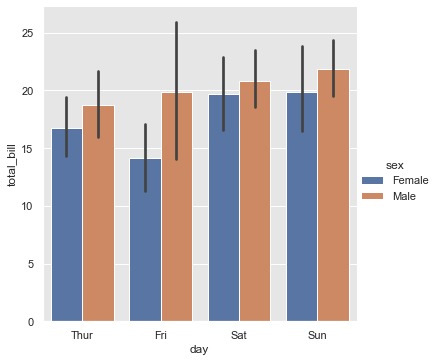

In [18]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="bar", order=["Thur","Fri","Sat","Sun"], data=rest_df)

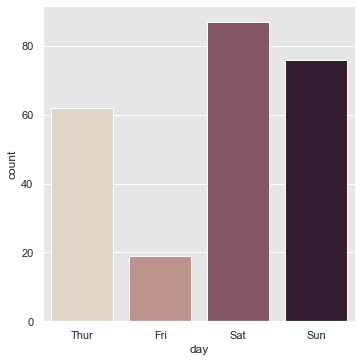

In [19]:
sns.catplot(x="day", kind="count", palette="ch:.25", order=["Thur","Fri","Sat","Sun"], data=rest_df)

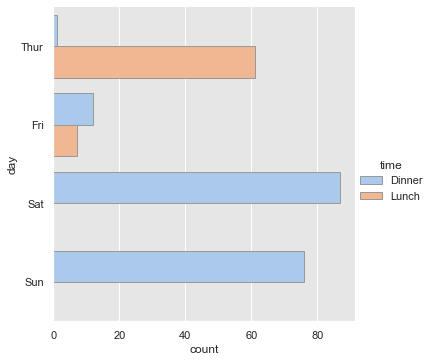

In [20]:
sns.catplot(y="day", hue="time", kind="count", palette="pastel", edgecolor=".6", order=["Thur","Fri","Sat","Sun"], data=rest_df)

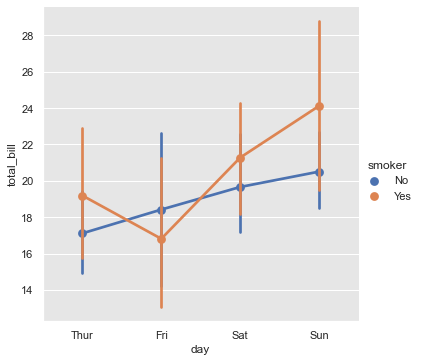

In [21]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="point", order=["Thur","Fri","Sat","Sun"], data=rest_df)

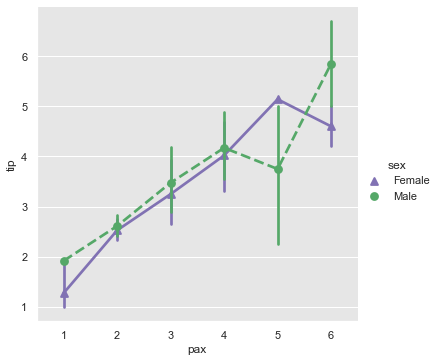

In [22]:
sns.catplot(x="pax", y="tip", hue="sex", palette={"Male": "g", "Female": "m"}, markers=["^", "o"], \
    linestyles=["-", "--"], kind="point", data=rest_df)

In [23]:
df = rest_df[['total_bill','tip']]
df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


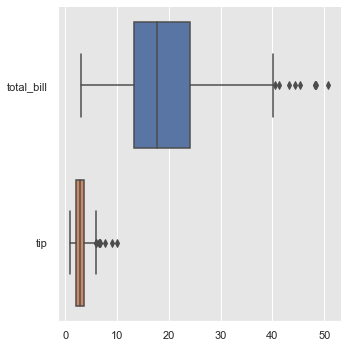

In [24]:
sns.catplot(data=df, orient="h", kind="box")

<AxesSubplot:xlabel='weekend', ylabel='total_bill'>

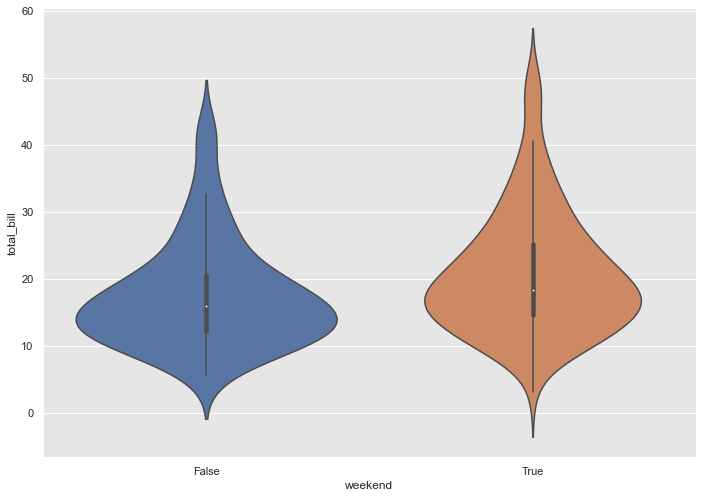

In [25]:
sns.violinplot(x=rest_df.weekend, y=rest_df.total_bill)

<AxesSubplot:xlabel='count', ylabel='day'>

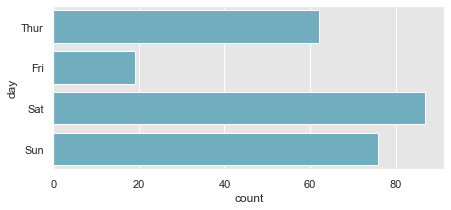

In [26]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="day", order=["Thur","Fri","Sat","Sun"], data=rest_df, color="c")

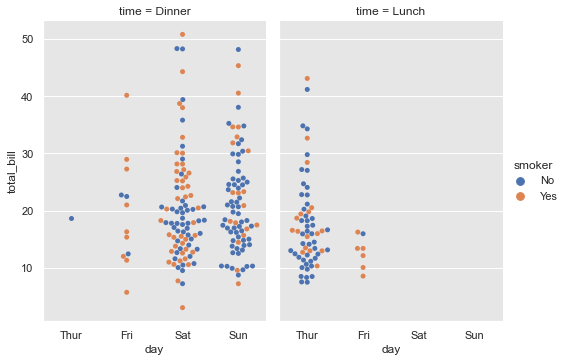

In [27]:
sns.catplot(x="day", y="total_bill", hue="smoker", col="time", aspect=.7, kind="swarm", order=["Thur","Fri","Sat","Sun"], data=rest_df)

In [28]:
rest_df.tip.mean()

2.9982786885245902

<Figure size 432x432 with 0 Axes>

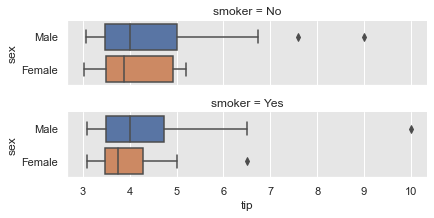

In [29]:
plt.figure(figsize=(6, 6))
sns.catplot(x="tip", y="sex", row="smoker", kind="box", orient="h", height=1.5, aspect=4, data=rest_df.query("tip > 3"))

In [32]:
x = rest_df['day'].value_counts().keys()
x

Index(['Sat', 'Sun', 'Thur', 'Fri'], dtype='object')

In [44]:
tuples = rest_df[['day','time']].value_counts().keys()
tuples

MultiIndex([( 'Sat', 'Dinner'),
            ( 'Sun', 'Dinner'),
            ('Thur',  'Lunch'),
            ( 'Fri', 'Dinner'),
            ( 'Fri',  'Lunch'),
            ('Thur', 'Dinner')],
           names=['day', 'time'])

In [48]:
y = rest_df[['day','time']].value_counts()
y

day   time  
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
Fri   Dinner    12
      Lunch      7
Thur  Dinner     1
dtype: int64

In [49]:
pd.MultiIndex.from_tuples(tuples, names=('day', 'time'))

MultiIndex([( 'Sat', 'Dinner'),
            ( 'Sun', 'Dinner'),
            ('Thur',  'Lunch'),
            ( 'Fri', 'Dinner'),
            ( 'Fri',  'Lunch'),
            ('Thur', 'Dinner')],
           names=['day', 'time'])

In [50]:
day =['Sat', 'Sun', 'Thur', 'Fri']
time = ['dinner', 'lunch']
pd.MultiIndex.from_product([day, time], names=['day', 'time'])

MultiIndex([( 'Sat', 'dinner'),
            ( 'Sat',  'lunch'),
            ( 'Sun', 'dinner'),
            ( 'Sun',  'lunch'),
            ('Thur', 'dinner'),
            ('Thur',  'lunch'),
            ( 'Fri', 'dinner'),
            ( 'Fri',  'lunch')],
           names=['day', 'time'])

In [51]:
y = rest_df['day'].value_counts()
y

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [131]:
trace1 = go.Bar(
                #x = rest_df[['day','time']].value_counts().keys(),
                x = rest_df['day'].value_counts().keys(),
                #y = rest_df[['day','time']].value_counts(),
                y = rest_df['day'].value_counts(),
                name = "day",
#                 marker = dict(
#                          colorscale='Jet',
#                          showscale=True),
                text = rest_df['day'])
data1 = [trace1]
layout = go.Layout(title = 'Restaurant Distribution by day', 
                   barmode = "group", 
                   yaxis = dict(title= 'Number of Restaurants'))
fig = go.Figure(data = data1, layout = layout)
py.offline.iplot(fig, filename = 'basic-line')

In [133]:
fig = px.histogram(rest_df, x="day", category_orders=dict(day=["Thur", "Fri", "Sat", "Sun"]))
fig.show()

In [142]:
fig = px.histogram(rest_df, x="day", y="total_bill", category_orders=dict(day=["Thur", "Fri", "Sat", "Sun"]))
fig.show()

In [134]:
# create the bins
counts, bins = np.histogram(rest_df.total_bill, bins=range(0, 60, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'total_bill', 'y':'count'})
fig.show()

- Type of normalization

In [135]:
fig = px.histogram(rest_df, x="total_bill", histnorm='probability density')
fig.show()

- Aspect of the histogram plot

In [136]:
fig = px.histogram(rest_df, x="total_bill",
                   title='Histogram of bills',
                   labels={'total_bill':'total bill'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred'] # color of histogram bars
                   )
fig.show()

- Several histograms for the different values of one column

In [138]:
fig = px.histogram(rest_df, x="total_bill", color="sex")
fig.show()

- Aggregating with other functions than count

In [139]:
fig = px.histogram(rest_df, x="total_bill", y="tip", histfunc='avg')
fig.show()

In [140]:
fig = px.histogram(rest_df, x="sex", y="total_bill", color="sex", pattern_shape="smoker")
fig.show()

In [83]:
fig = px.scatter(rest_df, x="total_bill", y="tip", color="sex")
fig.show()

In [84]:
fig = px.scatter(rest_df, x="total_bill", y="tip", color="smoker", marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [93]:
rest_df['e'] = round(rest_df['tip'] * 100 / (rest_df['total_bill']- rest_df['tip']))
rest_df.head()

,total_bill,tip,sex,smoker,day,time,pax,weekend,e
0,16.99,1.01,Female,No,Sun,Dinner,2,True,6.0
1,10.34,1.66,Male,No,Sun,Dinner,3,True,19.0
2,21.01,3.50,Male,No,Sun,Dinner,3,True,20.0
3,23.68,3.31,Male,No,Sun,Dinner,2,True,16.0
4,24.59,3.61,Female,No,Sun,Dinner,4,True,17.0


In [101]:
rest_df['e'] = rest_df['tip'] / (rest_df['total_bill']- rest_df['tip'])
fig = px.scatter(rest_df, x="total_bill", y="tip", color="sex", error_x="e", error_y="e")
fig.show()

In [159]:
fig = px.scatter_matrix(rest_df, dimensions=["total_bill", "tip"], color="smoker")
fig.show()

In [158]:
fig = px.parallel_coordinates(rest_df, color="tip", labels={"tip": "Tip", "total_bill": "Total Bill", "pax": "Pax", "e":"Tip (%)"}, color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [149]:
fig = px.scatter(rest_df, x="total_bill", y="tip", size="pax", color="sex", hover_name="time", log_x=True, size_max=10)
fig.show()

In [154]:
rest_df.tip.max()

10.0

In [ ]:
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

In [163]:
fig = px.scatter(rest_df, x="total_bill", y="tip", animation_frame="day", animation_group="time",
           size="pax", color="smoker", hover_name="time", facet_col="smoker",
           log_x=False, size_max=10, range_x=[0,60], range_y=[0,10])
fig.show()

In [169]:
fig = px.line(rest_df, x="total_bill", y="tip", color="smoker", line_group="sex", hover_name="sex", line_shape="spline", render_mode="svg")
fig.show()

In [171]:
fig = px.area(rest_df, x="total_bill", y="tip", color="smoker", line_group="sex")
fig.show()

In [180]:
fig = px.sunburst(rest_df, path=['day', 'time'], values='total_bill', color='pax', hover_data=['pax'])
fig.show()

In [181]:
fig = px.treemap(rest_df, path=[px.Constant('Total'), 'day', 'time'], values='total_bill', color='pax', hover_data=['pax'])
fig.show()

In [186]:
fig = px.icicle(rest_df, path=[px.Constant('Total'), 'day', 'time'], values='total_bill', color='pax', hover_data=['pax'])
fig.show()

In [58]:
fig = px.bar(rest_df, x="sex", y="total_bill", color="smoker", barmode="group")
fig.show()

In [125]:
fig = px.bar(rest_df, x="sex", y="total_bill", color="sex", pattern_shape="smoker", pattern_shape_map={"No": "/", "Yes": "+"})
fig.show()

In [126]:
fig = px.bar(rest_df, x="sex", y="total_bill", color="sex", pattern_shape="smoker", pattern_shape_sequence=["x", "+"], template="simple_white")
fig.show()

In [61]:
fig = px.bar(rest_df, x="sex", y="total_bill", color="smoker", barmode="group", facet_row="time", facet_col="day", category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})
fig.show()

In [63]:
fig = px.parallel_categories(rest_df, color="pax", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [64]:
fig = px.histogram(rest_df, x="total_bill", y="tip", color="sex", marginal="rug", hover_data=rest_df.columns)
fig.show()

In [65]:
fig = px.box(rest_df, x="day", y="total_bill", color="smoker", notched=True)
fig.show()

In [66]:
fig = px.violin(rest_df, y="tip", x="smoker", color="sex", box=True, points="all", hover_data=rest_df.columns)
fig.show()

In [67]:
fig = px.ecdf(rest_df, x="total_bill", color="sex")
fig.show()

In [68]:
fig = px.strip(rest_df, x="total_bill", y="time", orientation="h", color="smoker")
fig.show()

In [70]:
fig = px.pie(rest_df, values='total_bill', names='day', title='Total bill by day')
fig.show()

In [73]:
df = rest_df.groupby(['day', 'time']).agg({'pax': 'sum'})
df

pax
day  time       
Fri  Dinner   26
     Lunch    14
Sat  Dinner  219
Sun  Dinner  216
Thur Dinner    2
     Lunch   150

In [72]:
df = rest_df.groupby(['day','time'])['pax'].sum()
df

day   time  
Fri   Dinner     26
      Lunch      14
Sat   Dinner    219
Sun   Dinner    216
Thur  Dinner      2
      Lunch     150
Name: pax, dtype: int64

In [71]:
data = dict(
    pax =[150, 2, 14, 26, 219, 216],
    day_time = ["Thur: Lunch", "Thur: Dinner", "Fri: Lunch", "Fri: Dinner", "Sat: Dinner", "Sun: Dinner"])
fig = px.funnel(data, x='pax', y='day_time')
fig.show()

In [ ]:
# creem columna percentatge de propina

df['tip_pct'] = round(df['tip']*100 / (df['total_bill'] - df['tip']))

plt.figure(figsize =(8, 5))
sns.barplot(x='tip_pct', y='day', hue='time', data=df, orient='h')
plt.xlabel('Percentatge propina')
plt.ylabel('Dia setama')
plt.show()

**Nivell 2**

- Exercici 2

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [ ]:
# load the dataset
pd.options.display.max_columns = None
file = "movies.dat"
input_path = r"./input/"
#print(input_path)


movie_column_l = ['ID', 'TITOL', 'GENERES']
df = pd.read_table(datasets_path + file, sep='::', header=None, names=movie_column_l, engine='python')

#extraiem l'any de TITOL en una nova columna ANY (int)
import re
pattern = r"\(([1-2][0-9][0-9][0-9])\)"
df["ANY"] = df["TITOL"].apply(lambda x: int(re.search(pattern, x).group(1)))
#Esborrem l'any del titol
pattern = r" +\(.*\)"
df["TITOL"] = df["TITOL"].apply(lambda x: re.sub(pattern, "", x))
df.tail(2)

**Nivell 3**

- Exercici 3

Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.